# Computational Mechanics Boundary Values - Project 05

![6-string guitar diagram](../images/guitar.png)

In this final project, we will consider all six strings of a guitar and the deflection of the neck of the guitar. Here are the inputs for each of the strings, all L=0.64 m:

|string|density (g/m)|tension (kg)|
|---|---|---|
|E|0.401|7.28|
|B|0.708|7.22|
|G|1.140|7.32|
|D|2.333|8.41|
|A|4.466|9.03|
|E|6.790|7.71|

1. The neck of the guitar can be considered a cantilever beam with an applied moment, shown above. At the tip we have a moment equal to the sum of the (tensions in the strings) $\times$ (bridge height). Here we will consider it as $h=4~mm$. 

a. Use a finite difference approximation to determine the deflection of the guitar's bridge if the Young's modulus is E=10 GPa and it is a rectangular cross-section $2\times4~cm^2$ and $I=\frac{4\cdot2^3}{12}~cm^4.$

b. Demonstrate that your finite difference solution has converged. _e.g. decrease the step size $h$ and show the solution converges to a final value._

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
N=60
K = np.diag(np.ones(N)*6)+\
    np.diag(-np.ones(N-1)*4,1)+np.diag(-np.ones(N-1)*4,-1)+\
    np.diag(np.ones(N-2),2)+np.diag(np.ones(N-2),-2)
K[0,0]=7
K[-1,-1]=2
K[-1,-2]=-4
K[-1,-3]=2
K[-2,-2]=5
K[-2,-1]=-2
K

array([[ 7., -4.,  1., ...,  0.,  0.,  0.],
       [-4.,  6., -4., ...,  0.,  0.,  0.],
       [ 1., -4.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  6., -4.,  1.],
       [ 0.,  0.,  0., ..., -4.,  5., -2.],
       [ 0.,  0.,  0., ...,  2., -4.,  2.]])

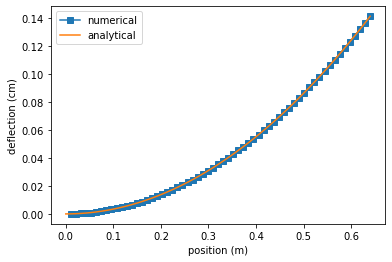

In [3]:
L=0.64
dx=L/(N)
I=4*2**3/12*1/(100**4) # convert cm^4 -> m^4
E=10e9 # N/m^2
string_vals = np.array([[0.401e-3,7.28],
                        [0.708e-3,7.22],
                        [1.14e-3,7.32],
                        [2.333e-3,8.41],
                        [4.466e-3,9.03],
                        [6.79e-3,7.71]])
M=np.sum(string_vals[:,1]*9.81)*4e-3
b=np.zeros(N)
b[-1]=2*M*dx**2/E/I
b[-2]=-M*dx**2/E/I
x=np.linspace(0,L,N+1)
w=np.linalg.solve(K,b)
plt.plot(x[1:],w*100,'s-',label='numerical')
plt.plot(x,M/E/I*x**2/2*100,label='analytical')
plt.xlabel('position (m)')
plt.ylabel('deflection (cm)')
plt.legend();

In [4]:
4e-2*(2e-2)**3/12
I

2.6666666666666664e-08

2. Here we will record the first three frequencies of the 6-string guitar.

a. Consider the G-string on the guitar, L=0.64 m, $\mu=1.14~g/m,$ and T=71.81 N [1]. 

__Guitar string equation:__ $\mu\frac{\partial^2 y}{\partial t^2}=T\frac{\partial ^2 y}{\partial x^2}$

a. Calculate the first, second, and third natural frequencies using 6, 30, 45, and 60 nodes. Plot the mode shapes and determine the number of nodes needed to converge for the first three modes.

In [5]:
def guitar_modes(N,L=0.64,T=71.81,mu=1.14e-3):
    '''General Finite Difference Wave Equation
    in a guitar string
    of the form T/mu*d^2y/dx^2=d^2y/dt^2
    Argumemts:
    ----------
    N: number of elements in guitar string finite diff
    L: length of guitar string
    T: tension in string
    mu: string density in kg/m
    Returns:
    ----------
    dstate: derivative of the state= [velocity,acceleration]
    '''
    dx=L/(N+1)
    k = T/dx**2/mu

    A = k*(np.diag(np.ones(N)*2)\
       -np.diag(np.ones(N-1),-1)\
       -np.diag(np.ones(N-1),1))
    e,v=linalg.eig(A)
    isort = np.argsort(e.real)
    e=e[isort].real
    v=v[:,isort].real
    return e,v

First 3 Natural frequencies of 6-element string (Hz)
[194.43708661 379.1242858  544.80061022]
First 3 Natural frequencies of 30-element string (Hz)
[195.99464595 391.48617646 585.97276757]
First 3 Natural frequencies of 45-element string (Hz)
[196.04043699 391.85229959 587.20727994]
First 3 Natural frequencies of 60-element string (Hz)
[196.05687232 391.9837462  587.65070938]


Text(0.5, 0.98, 'Convergence of mode shapes (axes are not to scale)\n\n')

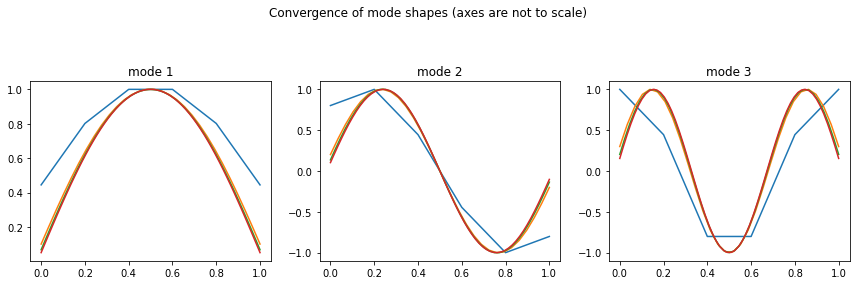

In [6]:
f, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,4),tight_layout=True)
for N in [6,30,45,60]:
    e,v=guitar_modes(N)
    print('First 3 Natural frequencies of {}-element string (Hz)'.format(N))
    print(e[0:3].real**0.5/2/np.pi)
    ax1.plot(np.linspace(0,1,N),np.abs(v[:,0])/np.max(np.abs(v[:,0])))
    if v[0,1]<0: v[:,1]*=-1
    ax2.plot(np.linspace(0,1,N),v[:,1]/np.max(np.abs(v[:,1])))
    if v[0,2]<0: v[:,2]*=-1
    ax3.plot(np.linspace(0,1,N),v[:,2]/np.max(np.abs(v[:,2])))
ax1.set_title('mode 1')
ax2.set_title('mode 2')
ax3.set_title('mode 3')
f.suptitle('Convergence of mode shapes (axes are not to scale)\n\n')

b. Use the number of nodes necessary for convergence to calculate the first 3 modes of vibration for the other 5 strings on the guitar. Display the first three natural frequencies for all six strings.

In this final project, we will consider all six strings of a guitar and the deflection of the neck of the guitar. Here are the inputs for each of the strings, all L=0.64 m:

|string|density (g/m)|tension (kg)|
|---|---|---|
|E|0.401|7.28|
|B|0.708|7.22|
|G|1.140|7.32|
|D|2.333|8.41|
|A|4.466|9.03|
|E|6.790|7.71|

In [7]:
string_name=['E','B','G','D','A','E']
string_vals = np.array([[0.401e-3,7.28],
                        [0.708e-3,7.22],
                        [1.14e-3,7.32],
                        [2.333e-3,8.41],
                        [4.466e-3,9.03],
                        [6.79e-3,7.71]])
string_f=np.zeros((6,3))
for i,string in enumerate(string_vals):
    e,v=guitar_modes(N=45,L=0.64,T=string[1]*9.81,mu=string[0])
    print('First 3 Natural frequencies of {}-string (Hz)'.format(string_name[i]))
    string_f[i,:]=e[0:3]**0.5
    print(e[0:3].real**0.5/2/np.pi)

First 3 Natural frequencies of E-string (Hz)
[329.63523775 658.88613556 987.36880161]
First 3 Natural frequencies of B-string (Hz)
[247.05411832 493.82018258 740.01047461]
First 3 Natural frequencies of G-string (Hz)
[196.03934499 391.85011687 587.20400904]
First 3 Natural frequencies of D-string (Hz)
[146.88611909 293.60097554 439.97350639]
First 3 Natural frequencies of A-string (Hz)
[110.00809489 219.88792527 329.51137616]
First 3 Natural frequencies of E-string (Hz)
[ 82.43894585 164.78177157 246.93246912]


In [8]:
string_f

array([[2071.15928257, 4139.90368606, 6203.82114704],
       [1552.28680629, 3102.7637156 , 4649.62294121],
       [1231.75153205, 2462.06689692, 3689.51160191],
       [ 922.91270532, 1844.74933571, 2764.4350709 ],
       [ 691.20124551, 1381.59658129, 2070.38103726],
       [ 517.97917329, 1035.35440603, 1551.52246185]])

c. Create an audio signal that has the 18 frequencies (6 strings $\times$ 3 modes) in an array and display it using the `from IPython.display import Audio` library. 

_Hint: you don't need to solve the differential equations here. You can use the calculated frequencies to add sine-waves together:_ $\sin(f_12\pi t)+\sin(f_22\pi t)+...$

(0.0, 0.05)

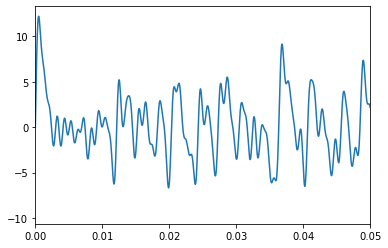

In [9]:
rate=20000
t=np.linspace(0,3,rate*3)
signal=np.zeros(len(t))
for f in string_f:
    signal+=np.sin(f[0]*t)+np.sin(f[1]*t)+np.sin(f[2]*t)
plt.plot(t,signal)
plt.xlim((0,0.05))

In [10]:
from IPython.display import Audio

In [11]:
Audio(data=signal,rate=rate)